# Project 02 - Image Processing

## Student information

- Full name: Hoàng Bảo Khanh
- Student ID: 22127183
- Class: 22CLC03

## Import libraries

In [222]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Helper functions

In [223]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    img_path : str
        Path of image

    Returns
        Image (2D)
    '''

    # CODE HERE
    image = Image.open(img_path)
    return image

def show_img(img_2d, img_name):
    '''
    Show image

    Parameters:
    img_2d : Image (2D)
    '''

    # CODE HERE
    plt.title(img_name)
    plt.axis('off')
    plt.imshow(img_2d, cmap='gray')

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters:
    img_2d : Image (2D)
    img_path : str
        Path of image
    '''

    #CODE HERE 
    img = Image.fromarray(img_2d)
    img.save(img_path + '.png')

## Image processing

1. Change brightness

In [224]:
def changeBrightness(img_2d, num=50):
    '''
    Adjusts the brightness of a image by adding a specified value to each pixel.

    Parameters:
        img_2d: numpy.ndarray
            Image 2D
        num: int
            The brightness adjustment value, must be between -255 and 255.

    Returns: numpy.ndarray
        The brightness-adjusted image as type uint8.
    Returns None if the brightness value is out of range.
    '''
    # Terminate if brightness out of range
    if num > 255 or num < -255:
      print("Brightness value out of range!")
      return
    brightness_value = np.array([num])
    result = np.clip(img_2d + brightness_value, 0, 255).astype(np.uint8)
    return result

2. Change contrast

In [225]:
def changeContrast(img_2d, contrast=50):
    '''
    Adjusts the brightness of a image using specified contrast value

    Parameters:
        img_2d: numpy.ndarray 
            Image(2D)
        contrast: int
            The contrast adjustment value
    
    Returns: numpy.ndarray
        The brightness-adjusted image as type uint8.
    '''
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    result = np.clip(factor * (img_2d.astype(float) - 128) + 128, 0, 255).astype(np.uint8)
    return result

3. Flip image

3.1 Flip vertically

In [226]:
def flipImageVertically(img_2d):
    '''
    Flip the image horizontally

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format
    
    Returns: numpy.ndarray
        The image after flipping.
    '''
    result = img_2d[::-1, :]
    return result

3.2 Flip horizontally

In [227]:
def flipImageHorizontally(img_2d):
    '''
    Flip the image horizontally

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format
    
    Returns: numpy.ndarray
        The image after flipping.
    '''
    result = img_2d[:, ::-1]
    return result 

4. Convert image to grayscale and sepia

4.1 Convert to grayscale

Apply the [grayscale formula](https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm): Red: 0.299, Blue: 0.587, Green: 0.114

In [228]:
def convertGrayScale(img_2d):
    '''
    Convert image to grayscale

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format
    
    Returns: numpy.ndarray
        The image after converting.
    '''
    weight = np.array([0.299, 0.587, 0.114])
    result = np.clip(img_2d @ weight, 0, 255).astype(np.uint8)
    return result

4.2 Convert to sepia

Apply the [sepia formula](https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image):
- tr = 0.393R + 0.769G + 0.189B
- tg = 0.349R + 0.686G + 0.168B
- tb = 0.272R + 0.534G + 0.131B

In [229]:
def convertSepiaScale(img_2d):
    '''
    Convert image to sepia

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format
    
    Returns: numpy.ndarray
        The image after converting.
    '''
    weight = np.array([[0.393, 0.769, 0.189],
                        [0.349, 0.686, 0.168],
                        [0.272, 0.534, 0.131]])
    result = np.clip(img_2d @ weight.T, 0, 255).astype(np.uint8)
    return result

5. Blur and Sharpen image

5.1 Blur image

In [230]:
def blur_image(img_2d, r=3):  #using box blur
    '''
    Blur the input image using box blur (except for the border pixels)

    Parameters:
        img_2d: np.ndarray
          An image with in ndarry format

        r: int
          The radius of the kernel (bigger radius for more blur)

    Returns:
        blur_img: np.ndarray
          A new image that have been blurred by box blur
    '''
    # Calculate kernel size
    kernel_size = 2*r + 1

    # Create kernel 
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    blurred_img = np.zeros_like(img_2d)
    height, width, num_channels = img_2d.shape

    # Blur image
    for i in range(r, height - r):
        for j in range(r, width - r):
            for channel in range(num_channels):
                blurred_img[i, j, channel] = np.sum(kernel * img_2d[i-r: i+r+1, j-r: j+r+1, channel])

    # Limit the pixel value from 0 to 255
    blur_img = np.clip(blurred_img, 0, 255).astype(np.uint8)
    return blur_img



5.2 Sharpen image

In [231]:
def sharpen_image(img_2d):
    '''
    Sharpen the input image (except for the border pixels)

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format

    Returns:
        sharpen_img: np.ndarray
            A new image that have been sharpen
    
    '''
    # Create kernel
    kernel = np.array([[-1, -1, -1], 
                       [-1, 8, -1],
                       [-1, -1, -1]])
    
    sharpen_img = np.zeros_like(img_2d, dtype=float)
    height, width, num_channels = img_2d.shape

    # Sharpen image
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            for channel in range(num_channels):
                sharpen_img[i, j, channel] = np.sum(kernel * img_2d[i-1: i+2, j-1: j+2, channel])    

    # Limit the pixel value from 0 to 255
    result_image = np.clip(img_2d + sharpen_img, 0, 255).astype(np.uint8)
    return result_image

6. Center crop

In [232]:
def cropCenter(img_2d, size=250):
    '''
    Crop the image in center with the default size (250)

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format

    Returns:
        result: np.ndarray
            A new image that have been cropped
    
    '''
    copy_img = np.copy(img_2d)
    height, width, _ = img_2d.shape

    if size > width or size > height:
        print("Invalid size!")
        return
    
    # Crop image
    top = (height - size) // 2      
    bottom = top + size
    left = (width - size) // 2
    right = left + size
    # Get the needed part after cropping
    result = copy_img[top:bottom, left:right].astype(np.uint8)

    return result

7. Circular crop

In [233]:
def cropCircular(img_2d):
    '''
    Crop the image into circle shape 

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format

    Returns:
        copy_img: np.ndarray
            A new image that have been cropped
    
    '''
    copy_img = np.copy(img_2d)
    height, width, _ = img_2d.shape
    # Find the center pixel
    center = (height // 2, width // 2)
    
    # Calculate the radius of circle
    radius = min(height, width) // 2
    
    # Creates two 2D arrays Y and X representing the grid of pixel
    y, x = np.ogrid[:height, :width]

    # Get the area by the formula of circle
    circular_area = ((y - center[0])**2 + (x - center[1]) ** 2) <= radius**2
    
    # The pixels outside the circle return black color
    copy_img[~circular_area] = 0
    return copy_img

8. Ellipses crop

In [234]:
def cropEllipses(img_2d):
    '''
    Crop the image into two ellipses symmetrically overlapping

    Parameters:
        img_2d: np.ndarray
            An image with in ndarry format
        

    Returns:
        copy_img: np.ndarray
            A new image that have been cropped
    
    '''
    copy_img = np.copy(img_2d)
    height, width, _ = img_2d.shape
    # Find the center pixel
    center = (height // 2, width // 2)
    
    # Creates two 2D arrays Y and X representing the grid of pixel
    y, x = np.ogrid[:height, :width]
    
    # Estimate the semi major and semi minor value
    semi_major = np.sqrt(2 / 5) * min(height, width)
    semi_minor = semi_major / 2
    
    # Minus center's coordinates because the different position of point (0, 0) in original image and coordinates system. 
    new_x = ((x - center[1]) + (y - center[0])) / (np.sqrt(2))
    new_y = ((x - center[1]) - (y - center[0])) / (np.sqrt(2))
    elip1 = (new_x)**2 / (semi_major)**2 + (new_y)**2 / (semi_minor)**2 <= 1
    elip2 = (new_y)**2 / (semi_major)**2 + (new_x)**2 / (semi_minor)**2 <= 1

    # The pixels outside the ellipses return black color
    copy_img[~(elip1 | elip2)] = 0
    return copy_img

9. Phóng to, thu nhỏ ảnh

In [235]:
def zoom_image(image_array, zoom_factor):
    '''
    Zooms an image using nearest neighbor interpolation.

    Parameters:
        image_array: np.ndarray
            An image with in ndarry format
        zoom_factor: float
            The zoom factor. A value greater than 1 enlarges the image,
            while a value less than 1 shrinks it.

    Returns:
        zoomed_image_array: np.ndarray
            The zoomed image as a NumPy array
    
    '''
    # Get the dimensions of the image
    height, width, num_channels = image_array.shape
    
    # Calculate the new size
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    # Create an empty array for the zoomed image
    zoomed_image_array = np.zeros((new_height, new_width, num_channels), dtype=image_array.dtype)
    
    # Calculate the zoomed image using interpolation
    for i in range(new_height):
        for j in range(new_width):
            orig_x = int(i / zoom_factor)
            orig_y = int(j / zoom_factor)
            zoomed_image_array[i, j] = image_array[orig_x, orig_y]
    
    return zoomed_image_array

- Do all functions

In [236]:
def do_all(img, img_name):
    '''
    To do all functions of image processing

    Parameters:
        img: np.ndarray
            An image with in ndarry format
        img_name: str
            The image's name

    '''
    img1 = np.copy(img)
    new_img = changeBrightness(img1)
    save_img(new_img, f'{img_name}_brightness')

    img1 = np.copy(img)
    new_img = changeContrast(img1)
    save_img(new_img, f'{img_name}_contrast')

    img1 = np.copy(img)
    flip1_img = flipImageVertically(img1)
    save_img(flip1_img, f'{img_name}_flip_vertically')
    
    img1 = np.copy(img)
    flip2_img = flipImageHorizontally(img1)
    save_img(flip2_img, f'{img_name}_flip_horizontally')

    img1 = np.copy(img)
    new_img = convertGrayScale(img1)
    save_img(new_img, f'{img_name}_grayscale')

    img1 = np.copy(img)
    new_img = convertSepiaScale(img1)
    save_img(new_img, f'{img_name}_sepia')

    img1 = np.copy(img)
    new_img = blur_image(img1)
    save_img(new_img, f'{img_name}_blur')

    img1 = np.copy(img)
    new_img = sharpen_image(img1)
    save_img(new_img, f'{img_name}_sharpen')

    img1 = np.copy(img)
    new_img = cropCenter(img1)
    save_img(new_img, f'{img_name}_crop_center')

    img1 = np.copy(img)
    new_img = cropCircular(img1)
    save_img(new_img, f'{img_name}_crop_circular')

    img1 = np.copy(img)
    new_img = cropEllipses(img1)
    save_img(new_img, f'{img_name}_crop_ellipses')

    img1 = np.copy(img)
    img2 = np.copy(img)
    new_img = zoom_image(img1, 2)
    save_img(new_img, f'{img_name}_zoom_in')
    new_img = zoom_image(img1, 0.5)
    save_img(new_img, f'{img_name}_zoom_out')


## Main Function

In [237]:
# CODE HERE
def main():
    print('''
            0. Do everything! 
            1. Adjust brightness (Default +50)
            2. Adjust contrast (Default +50)
            3. Flip image
            4. Grayscale/Sepia
            5. Blur/Sharpen image
            6. Crop center
            7. Crop with shape (circle/ellipses)
            8. Zoom Image (Zoom in / out)
            ''')
    img_path = input("Enter the image path: ")

    image = read_img(img_path)
    img = np.array(image)
    img_name = img_path.split('.')[0]

    choice = int(input("Enter your choice: "))
    if choice == 0:
        do_all(img, img_name)
    elif choice == 1:
        new_img = changeBrightness(img)
        show_img(new_img, f'Brightness 50')
        save_img(new_img, f'{img_name}_brightness')
    elif choice == 2:
        new_img = changeContrast(img)
        show_img(new_img, f'Contrast 50')
        save_img(new_img, f'{img_name}_contrast')
    elif choice == 3:
        print('''
                1. Vertical
                2. Horizontal
                ''')
        new_choice = int(input("Enter direction: "))
        img_name = img_path.split('.')[0]
        copy_img1 = np.copy(img)
        copy_img2 = np.copy(img)
        if (new_choice == 1):
            flip1_img = flipImageVertically(copy_img1)
            show_img(flip1_img, f'Flip Vertically')
            save_img(flip1_img, f'{img_name}_flip_vertically')
        elif (new_choice == 2):
            flip2_img = flipImageHorizontally(copy_img2)
            show_img(flip2_img, f'Flip Horizontally')
            save_img(flip2_img, f'{img_name}_flip_horizontally')
        else:
            print("Invalid choice")
            return
    elif choice == 4:
        print('''
                1. Grayscale
                2. Sepia
                ''')
        
        copy_img1 = np.copy(img)
        copy_img2 = np.copy(img)
        new_choice = int(input("Enter type of convertion: "))
        if (new_choice == 1):
            new_img1 = convertGrayScale(copy_img1)
            show_img(new_img1, f'Grayscale')
            save_img(new_img1, f'{img_name}_grayscale')
        elif (new_choice == 2):
            new_img2 = convertSepiaScale(copy_img2)
            show_img(new_img2, f'Sepia')
            save_img(new_img2, f'{img_name}_sepia')
        else: 
            print("Invalid choice")
            return
    elif choice == 5:
        print('''
                1. Blur
                2. Sharpen
                ''')
        
        copy_img1 = np.copy(img)
        copy_img2 = np.copy(img)
        new_choice = int(input("Enter your choice (blur/sharpen): "))
        if (new_choice == 1):
            new_img1 = blur_image(copy_img1)
            show_img(new_img1, f'Blur')
            save_img(new_img1, f'{img_name}_blur')
        elif (new_choice == 2):
            new_img2 = sharpen_image(copy_img2)
            show_img(new_img2, f'Sharpen')
            save_img(new_img2, f'{img_name}_sharpen')
        else:
            print("Invalid choice")
            return
    elif choice == 6:
        copy_img = np.copy(img)
        new_img = cropCenter(copy_img)
        show_img(new_img, f'Crop center')
        save_img(new_img, f'{img_name}_crop_center')
    elif choice == 7:
        print('''
                1. Circular
                2. Ellipses
                ''')
        
        new_choice = int(input("Enter your choice (circular / ellipses): "))
        if (new_choice == 1):
            copy_img = np.copy(img)
            new_img = cropCircular(copy_img)
            show_img(new_img, f'Crop circular')
            save_img(new_img, f'{img_name}_crop_circular')
        elif (new_choice == 2):
            copy_img = np.copy(img)
            new_img = cropEllipses(copy_img)
            show_img(new_img, f'Crop ellipses')
            save_img(new_img, f'{img_name}_crop_ellipses')
        else:
            print("Invalid choice")
            return
    elif choice == 8:
        print('''
                1. Zoom in
                2. Zoom out
                ''')
        new_choice = int(input("Enter your choice (In / Out): "))
        if new_choice == 1:
            copy_img = np.copy(img)
            zoom_factor = 2
            new_img = zoom_image(copy_img, zoom_factor)
            show_img(new_img, f'Zoom in x2')
            save_img(new_img, f'{img_name}_zoom_in')
        elif new_choice == 2:
            copy_img = np.copy(img)
            zoom_factor = 0.5
            new_img = zoom_image(copy_img, zoom_factor)
            show_img(new_img, f'Zoom out x2')
            save_img(new_img, f'{img_name}_zoom_out')
        else:
            print("Invalid choice")
            return
    else:
        print("Invalid choice")
        return

# Call main function


            0. Do everything! 
            1. Adjust brightness (Default +50)
            2. Adjust contrast (Default +50)
            3. Flip image
            4. Grayscale/Sepia
            5. Blur/Sharpen image
            6. Crop center
            7. Crop with shape (circle/ellipses)
            8. Zoom Image (Zoom in / out)
            

                1. Zoom in
                2. Zoom out
                


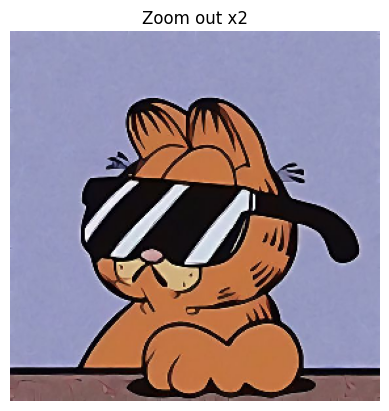

In [238]:
main()